In [1]:
import numpy as np
import pandas as pd

## 1. Reading Data Set

### 1.1. HS300 index overview

In [2]:
df_hs300 = pd.read_csv("01_data/hs300.csv")
df_hs300.head()

,交易日期,开盘点位,最高点位,最低点位,收盘价,成交量(万股),成交额(万),涨跌幅(%)
0,2007-01-04,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
1,2007-01-05,2051.15,2083.40,2030.76,2072.88,927434.47,6802606.02,0.28
2,2007-01-08,2072.01,2131.74,2071.72,2131.56,847679.09,6630393.61,2.83
3,2007-01-09,2137.49,2201.36,2128.06,2200.09,815776.29,6545619.27,3.22
4,2007-01-10,2210.76,2255.97,2194.77,2255.97,849049.79,6882262.48,2.54


### 1.2. HS300 stocks and weights

In [3]:
df_hs300_c_s = pd.read_csv("01_data/hs300_constituent_stocks.csv")
df_hs300_c_s.head()

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重
0,2007-01-04,1,14.65,15.32,13.83,14.11,69207082.0,1.016723e+09,2.745555e+10,1.409362e+09,-0.0249,1.27
1,2007-01-04,2,15.70,16.56,15.28,15.48,75119519.0,1.206786e+09,6.764603e+10,3.254255e+09,0.0026,3.32
2,2007-01-04,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16
3,2007-01-04,12,11.15,11.30,10.66,10.95,6934903.0,7.560341e+07,1.111932e+10,2.176753e+08,-0.0045,0.14
4,2007-01-04,21,8.38,8.75,8.33,8.38,9271213.0,7.938714e+07,7.370365e+09,3.116781e+08,0.0060,0.17


### 1.3. HS300 constituents stocks predict

In [4]:
df_hs300_c_s_p = pd.read_csv("01_data/hs300_constituent_stocks_predict.csv")
df_hs300_c_s_p.head()

,date,code,pred
0,2021-01-04,1,183.0
1,2021-01-04,2,279.0
2,2021-01-04,63,192.0
3,2021-01-04,66,259.0
4,2021-01-04,69,165.0


## 2. Data Explore

### 2.1. Describe HS300 Index

2.1.1. HS300 Close Price Line

In [5]:
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [6]:
df_hs300[['交易日期','收盘价']]

,交易日期,收盘价
0,2007-01-04,2067.09
1,2007-01-05,2072.88
2,2007-01-08,2131.56
3,2007-01-09,2200.09
4,2007-01-10,2255.97
...,...,...
4128,2023-12-25,3347.45
4129,2023-12-26,3324.79
4130,2023-12-27,3336.36
4131,2023-12-28,3414.54


In [7]:
date = np.array(df_hs300['交易日期'])
date = date.astype(np.datetime64)
close = np.array(df_hs300['收盘价'])

In [8]:
# 定义采样间隔（例如：按天采样）
interval = np.timedelta64(30, 'D')  # 可选单位：'h'(小时), 'm'(分钟), 's'(秒)

# 计算每个时间点所属的时间段编号
start = date.min()
time_deltas = date - start
group_indices = (time_deltas.astype('timedelta64[s]').astype(int) 
                 // interval.astype('timedelta64[s]').astype(int))

# 分组聚合（例如：取每段时间内的均值）
unique_groups, group_ids = np.unique(group_indices, return_inverse=True)
sampled_times = start + unique_groups * interval
sampled_values = np.array([np.mean(close[group_ids == i]) 
                          for i in range(len(unique_groups))])

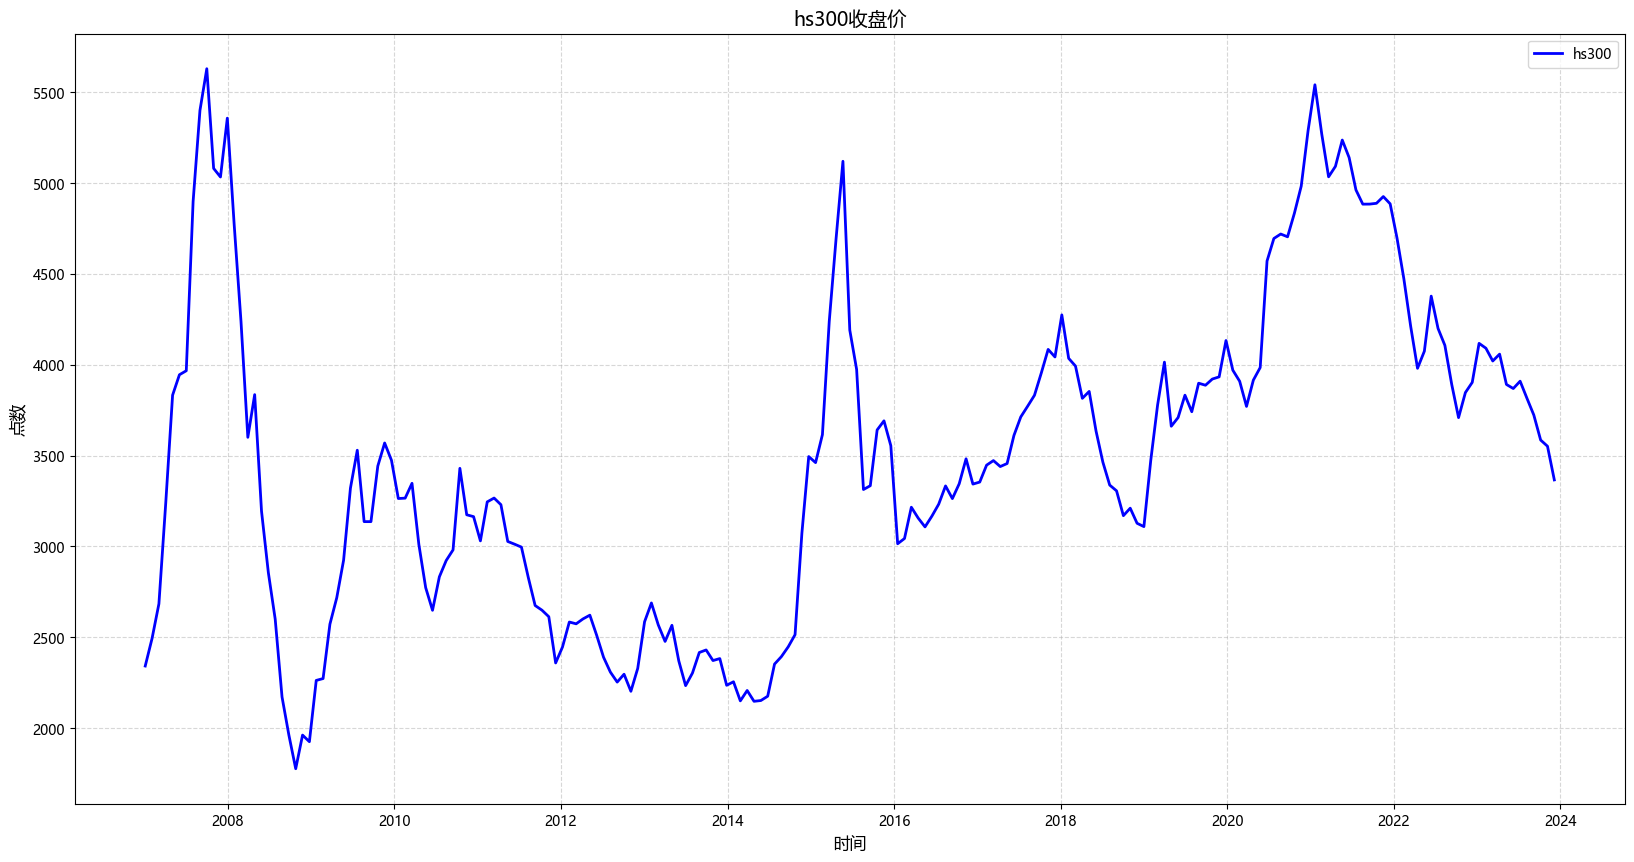

In [9]:
# 绘制曲线图
plt.figure(figsize=(20, 10))         # 设置图像大小
plt.plot(sampled_times, sampled_values, label='hs300', color='blue', linestyle='-', linewidth=2)

# 添加标题和标签
plt.title('hs300收盘价', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('点数', fontsize=12)

# 添加图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图像
plt.show()

#### 2.2.2 HS300 Correlation

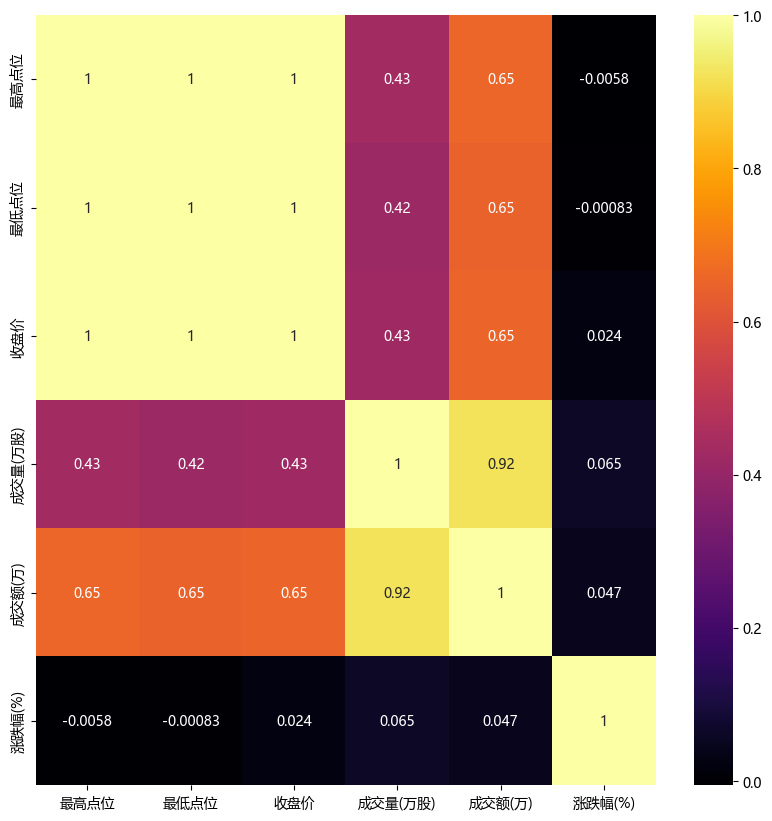

In [11]:
num_var=['最高点位','最低点位','收盘价','成交量(万股)','成交额(万)','涨跌幅(%)']
plt.figure(figsize=(10,10))
sns.heatmap(df_hs300[num_var].corr(), annot=True, cmap='inferno');
plt.show()

## 2.2. Describe HS300 Pre Index

#### 2.2.1. Correlation between pre and index

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df_hs300_c_s_p['pred'].corr(), annot=True, cmap='inferno');
# plt.show()